In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement2.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(LPA)')

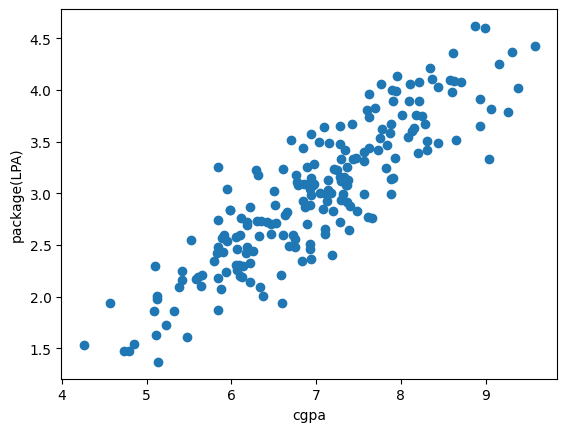

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(LPA)')

In [5]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)

Text(0, 0.5, 'package(LPA)')

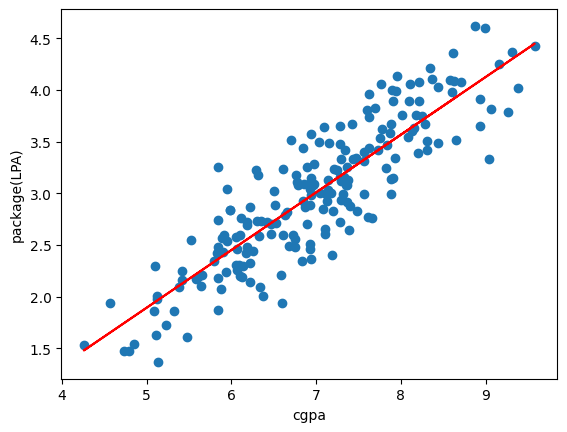

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package(LPA)')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
print('MAE:',mean_absolute_error(y_test,y_pred))  #unit:LPA

MAE: 0.2884710931878175


In [15]:
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 0.12129235313495527


In [16]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))   #unit:LPA

RMSE: 0.34827051717731616


In [17]:
print('r2_score:',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2_score: 0.780730147510384


In [18]:
n=x_test.shape[0]

In [19]:
#cgpa column can explain 78% variance on package column

In [20]:
#Adjusted r2_score

1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [21]:
#now we introduce a random column and check the r2 score and adjusted r2 score

In [22]:
new_df=df.copy()
new_df['random_feature']=np.random.random(200)
new_df=new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.083237,3.26
1,5.12,0.095633,1.98
2,7.82,0.640580,3.25
3,7.42,0.002259,3.67
4,6.94,0.028867,3.57


Text(0, 0.5, 'package(LPA)')

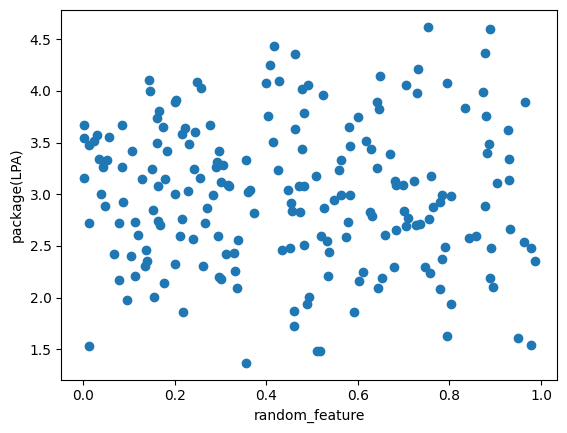

In [23]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('package(LPA)')

In [24]:
x1=df.iloc[:,0:2]
y1=df.iloc[:,-1]
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)

LinearRegression()

In [26]:
y_pred1=lr.predict(x_test1)

In [27]:
print('r2_score:',r2_score(y_test1,y_pred1))
r2=r2_score(y_test1,y_pred1)

r2_score: 0.780730147510384


In [28]:
#Adjusted r2_score

1 - ((1-r2)*(40-1)/(40-1-2))

0.7688777230514858

In [29]:
new_df2=df.copy()

In [30]:
new_df2['iq']=new_df2['package']+(np.random.randint(-12,12,200)/10)

In [31]:
np.random.randint(-12,12,200)/10

array([-0.5,  0.2,  0.5, -0.8, -0.9, -1.2, -0.7,  0. , -0.1, -0.4, -0.9,
        1. ,  1.1, -1.2,  0. ,  1.1, -1.1, -0.2,  0.7,  1.1, -1. , -0.2,
       -0.8, -0.1,  0.2, -0.9,  0.2, -1. , -0.8, -1. ,  0.3,  0.2,  0.4,
       -0.8, -0.4,  0.2, -0.7, -0.3,  0.9, -0.2, -0.8,  0.7,  0.8,  1.1,
       -0.5, -0.8, -0.9,  0.9,  1.1,  1.1,  0.4,  1. , -1.2,  1. ,  0.1,
       -0.4,  1.1, -0.8, -0.2, -0.2, -0.9, -1. , -0.7, -1.1, -0.8,  1. ,
       -0.6, -0.6, -1.1, -0.6,  0.8,  0. ,  0.2, -0.3, -0.2, -1.2, -0.6,
        0.7,  0.6,  0.2,  0.6,  1. , -0.1,  0.1,  0.8,  0.5, -0.2,  0.4,
       -0.9, -0.8,  0.6,  0.6, -1.1, -0.2, -0.8,  0.1, -0.9,  0.8,  0.2,
        0.4, -0.9,  0. , -0.7, -1.2,  0.5, -0.2,  0.5, -0.4,  0. ,  1. ,
        0.8,  0. , -1.1, -0.6, -0.6,  0.1, -1.2,  0.9, -1.2, -0.9, -0.2,
        0.8,  0.2,  0.2,  1.1,  1.1, -0.6,  1.1, -0.7, -0.2,  0.7, -0.8,
        1. ,  0.4,  0.3,  0.5, -0.6, -1.2,  0.3,  0.1, -1.2,  0.4, -1. ,
        0.3,  0.2, -0.3, -0.8,  0.1,  1.1,  0. , -1

In [32]:
new_df2.sample(5)

,cgpa,package,iq
17,5.38,2.09,2.29
108,7.76,3.54,4.54
56,5.84,2.74,2.64
77,8.99,4.60,4.50
129,7.29,3.12,2.32


Text(0, 0.5, 'package(LPA)')

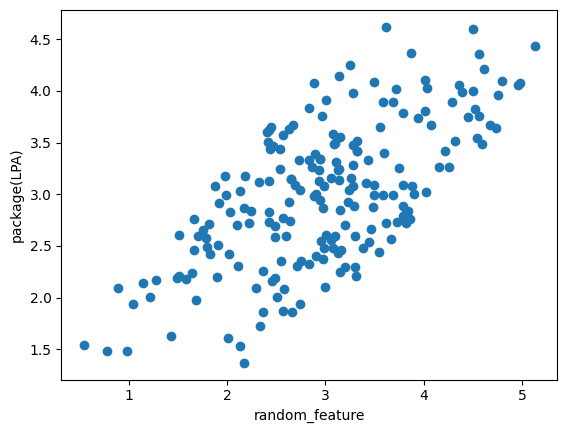

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('random_feature')
plt.ylabel('package(LPA)')

In [34]:
x2=df.iloc[:,0:2]
y2=df.iloc[:,-1]
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
lr=LinearRegression()
lr.fit(x_train2,y_train2)

LinearRegression()

In [36]:
y_pred2=lr.predict(x_test2)

In [37]:
print('r2_score:',r2_score(y_test2,y_pred2))
r2_1=r2_score(y_test2,y_pred2)

r2_score: 0.780730147510384


In [38]:
#Adjusted r2_score

1 - ((1-r2_1)*(40-1)/(40-1-2))

0.7688777230514858